# 3. Linear Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 3.1 Generate Data

In [3]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1)

print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


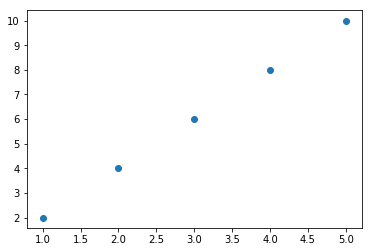

In [4]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

## 3.2 Derive Normal Equation (참고)

In [5]:
xtx = torch.mm(x.t(),x)
xtx_inv = xtx.inverse()
xtx_inv_xt = torch.mm(xtx_inv, x.t())

In [6]:
w = torch.mm(xtx_inv_xt, y)
w.item()

1.9999998807907104

## 3.3 Define Model with Grad, nn.loss

In [7]:
w = torch.rand(1,1)
w.item()

0.5926223397254944

In [8]:
w*x

tensor([[0.5926],
        [1.1852],
        [1.7779],
        [2.3705],
        [2.9631]])

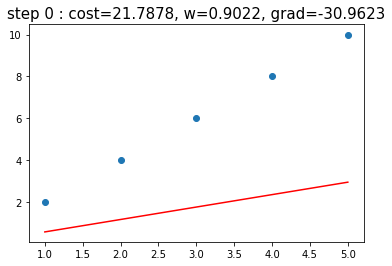

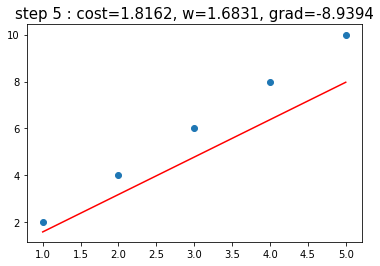

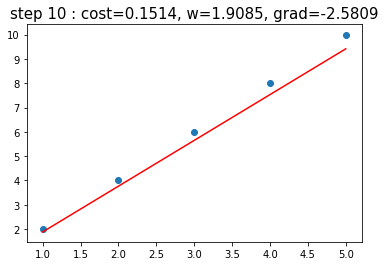

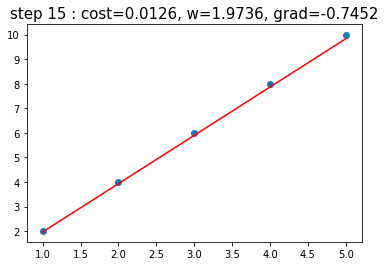

In [9]:
lr = 0.01

for step in range(20):
    pre = w*x
    cost = ((pre - y) ** 2).sum() / len(x)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    if step % 5 == 0 :
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), pre.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
        plt.show()


In [10]:
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

11.941325187683105

## 3.4 Define Model with nn.Linear, Optimizer

In [11]:
model = nn.Linear(1, 1, bias = False)
model.weight

Parameter containing:
tensor([[0.4171]], requires_grad=True)

In [12]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

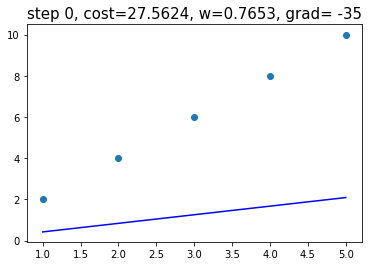

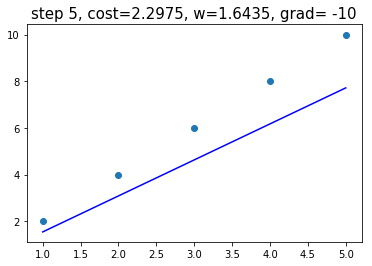

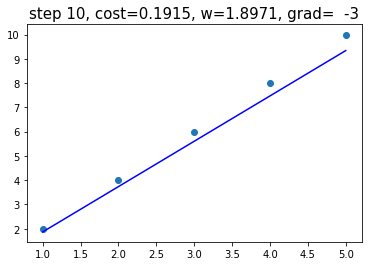

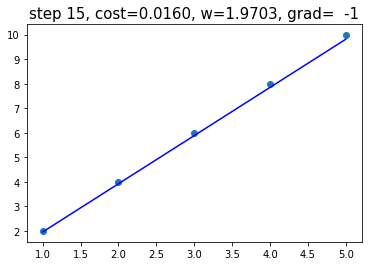

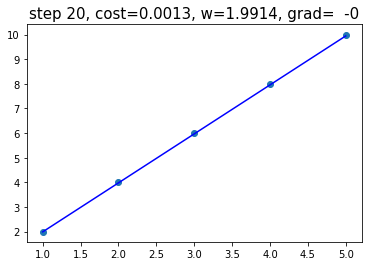

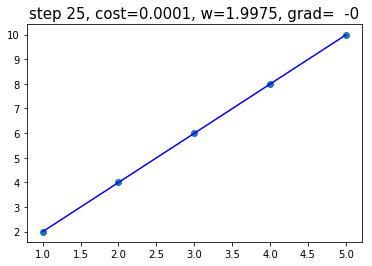

In [13]:
for step in range(30):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5 == 0:
        plt.scatter(x.numpy(), y.numpy())
        # grad를 가진 tensor는 numpy()를 바로 사용할 수 없음
        # RuntimeError: Can't call numpy() on Variable that requires grad.
        plt.plot(x.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' 
                  % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
        plt.show()

In [14]:
x_new = torch.Tensor([6])
y_new = model(x_new)
y_new.item()

11.994498252868652